In [1]:
import csoundengine as ce

In [2]:
e = ce.Engine()
s = e.session()



--Csound version 6.19 (double samples) May 26 2023
[commit: 593ac80dd986b58f24e3d59242243ba6266edda7]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 1024 sample-frame blocks
reading 8192-byte blks of shorts from adc:Built-in Audio Analogue Stereo: (RAW)
writing 2048 sample blks of 64-bit floats to dac:Built-in Audio Analogue Stereo:
SECTION 1:


In [13]:
s.defInstr('foo', r'''
|kmidi=60, kamp=0.1|
outch 1, oscili:a(kamp, mtof:k(lag:k(kmidi, 0.1)))
''')

Instr(foo, kmidi:5=60, kamp:6=0.1)

In [4]:
sy = s.sched('foo', kmidi=60, kamp=0.2)
sy

Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ foo:501.0002 start:7.639 dur:-1.000 p4=0 kmidi:5=60 kamp:6=0.2)

kmidi: 60.000000, kamp: 0.200000



In [27]:
s.engine.extraLatency = 0.2

In [28]:
with s.engine.lockedClock():
    sy = s.sched('foo', dur=10, kmidi=60)
    sy.set(kmidi=107, delay=2)
    sy.automate('kmidi', (3, 67, 4, 60, 4.5, 67, 4.6, 60, 4.7, 67, 4.8, 60, 6, 62))
    # r.setEndMarker(5)


In [31]:
s.engine.extraLatency = 1
    
with s.engine.lockedClock():
    for j in range(40):
        for i in range(60):
            sy = s.sched('foo', dur=0.01, kmidi=36+i, delay=j*0.25, kamp=0.01)
        

UnifiedCSD:  /tmp/tmpo8ziocib.csd
instr _stop uses instrument number 5
instr _automatePargViaPargs uses instrument number 6
instr _automatePargViaTable uses instrument number 7
instr _automateTableViaTable uses instrument number 8
instr _pwrite uses instrument number 9
Elapsed time at end of orchestra compile: real: 0.011s, CPU: 0.011s
sorting score ...
	... done
Elapsed time at end of score sort: real: 0.012s, CPU: 0.011s
--Csound version 6.19 (double samples) May 26 2023
[commit: 593ac80dd986b58f24e3d59242243ba6266edda7]
libsndfile-1.2.0
graphics suppressed, ascii substituted
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
Strsets[20]: 'linear'
ftable 101:
ftable 101:	10000 points, scalemax 0.000
ftable 102:
ftable 102:	1000 points, scalemax 0.000
ftable 103:
ftable 103:	100 points, scalemax 0.000
ftable 104:
ftable 104:	10000 points, scalemax 0.000
ftable 105:
ftable 105:	1000 points, scalemax 0.000
ftable 106:
ftable 106:	10000 points, scalemax 0.000
orc


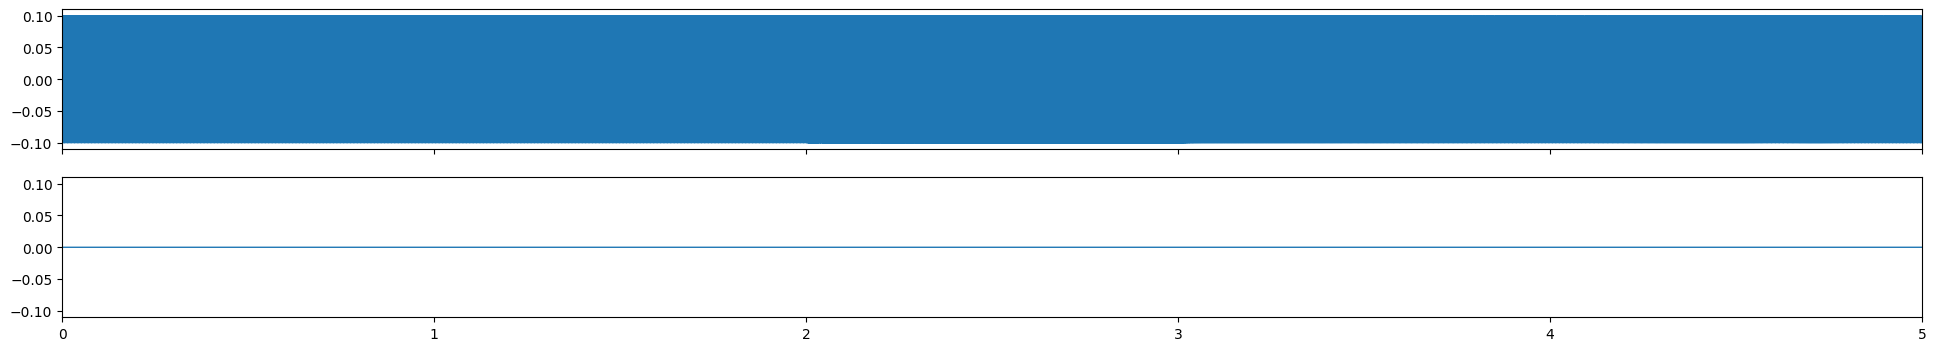

kmidi: 36.000000, kamp: 0.100000

kmidi: 37.000000, kamp: 0.100000

kmidi: 38.000000, kamp: 0.100000

kmidi: 39.000000, kamp: 0.100000

kmidi: 40.000000, kamp: 0.100000

kmidi: 41.000000, kamp: 0.100000

kmidi: 42.000000, kamp: 0.100000

kmidi: 43.000000, kamp: 0.100000

kmidi: 44.000000, kamp: 0.100000

kmidi: 45.000000, kamp: 0.100000

kmidi: 46.000000, kamp: 0.100000

kmidi: 47.000000, kamp: 0.100000

kmidi: 48.000000, kamp: 0.100000

kmidi: 49.000000, kamp: 0.100000

kmidi: 50.000000, kamp: 0.100000

kmidi: 51.000000, kamp: 0.100000

kmidi: 52.000000, kamp: 0.100000

kmidi: 53.000000, kamp: 0.100000

kmidi: 54.000000, kamp: 0.100000

kmidi: 55.000000, kamp: 0.100000

kmidi: 56.000000, kamp: 0.100000

kmidi: 57.000000, kamp: 0.100000

kmidi: 58.000000, kamp: 0.100000

kmidi: 59.000000, kamp: 0.100000

kmidi: 60.000000, kamp: 0.100000

kmidi: 61.000000, kamp: 0.100000

kmidi: 62.000000, kamp: 0.100000

kmidi: 63.000000, kamp: 0.100000

kmidi: 64.000000, kamp: 0.100000

kmidi: 65.0000

In [11]:
with s.rendering(endtime=8) as r:
    sy = r.sched('foo', dur=10, kmidi=60)
    sy.set(kmidi=107, delay=2)
    sy.automate('kmidi', (3, 67, 4, 60, 4.5, 67, 4.6, 60, 4.7, 67, 4.8, 60, 6, 62))
    r.setEndMarker(5)
r

In [5]:
r.writeCsd('~/tmp/foo.csd')

In [7]:
r.renderedJobs

[RenderJob(outfile='/home/em/tmp/test.wav', samplerate=44100, encoding='', starttime=0.0, endtime=10.0)]

In [8]:
r.renderedJobs[-1].openOutfile()

QSocketNotifier: Can only be used with threads started with QThread
kf.service.services: KApplicationTrader: mimeType "x-scheme-handler/file" not found
Gtk-Message: 17:12:28.430: Failed to load module "appmenu-gtk-module"
QSocketNotifier: Can only be used with threads started with QThread


In [9]:
r